##### Imports

In [1]:
"""
Focus on human data primarily on hIVSCC-MET for AIBS
-Tree call for Mouse
-Seurat prediction score for Human

*Make a scatter plot NMS score vs Seurat prediction score (Add n values)
1) RNA amp pass
2) RNA amp fail 


*Make same plot as Agata with barplot, tree call option with counts for RNA_amp, NMS fail and options
Collaborators have hIVSCC-MET and hIVSCC-METx
"""

'\nFocus on human data primarily on hIVSCC-MET for AIBS\n-Tree call for Mouse\n-Seurat prediction score for Human\n\n*Make a scatter plot NMS score vs Seurat prediction score (Add n values)\n1) RNA amp pass\n2) RNA amp fail \n\n\n*Make same plot as Agata with barplot, tree call option with counts for RNA_amp, NMS fail and options\nCollaborators have hIVSCC-MET and hIVSCC-METx\n'

In [2]:
import pandas as pd
import numpy as np
import csv
import logging
import os
from scipy.stats import pearsonr

from functions.temp_funcs import read_file, merge_dataframes, drop_cols, drop_nans, filter_date_range, \
filter_df, create_container_col, create_cond_df, create_container_df

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context = "notebook", style = "ticks", font="verdana") # font_scale = 1.35)
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Paths

In [3]:
path = "C:/Users/kumar/Documents/Github/analysis_projects/analysis_scripts/"
csv_path = os.path.join(path, "csv/")
excel_path = os.path.join(path, "excel/")
plot_path = os.path.join(path, "plot/")
path_shiny_human = os.path.join(csv_path, "current_shiny_human.csv")

##### Start Code

In [4]:
fields_shiny = ["cell_name", "cell_specimen_project", "Norm_Marker_Sum.0.4_label",
                "marker_sum_norm_label", "rna_amplification_pass_fail",
                "percent_cdna_longer_than_400bp", "amplified_quantity_ng", "sample_id", 
                "Tree_call", "seurat_prediction_score_label"]

shiny_dict = {"Norm_Marker_Sum.0.4_label" : "NMS Pass/Fail",
              "rna_amplification_pass_fail" : "RNA amp Pass/Fail",
              "marker_sum_norm_label": "NMS score",
              "percent_cdna_longer_than_400bp" : "cDNA quality (%>400 bp)",
              "amplified_quantity_ng" : "Amplified content (ng)"}

In [5]:
shiny_human = read_file(path_shiny_human, fields_shiny) #3592 rows
shiny_human.rename(columns=shiny_dict, inplace=True)
shiny_human.dropna(subset=["cell_specimen_project"],inplace=True) #3578 rows

INFO:functions.temp_funcs:Read file in as a pandas dataframe


In [6]:
shinyh = filter_df(shiny_human, "cell_specimen_project", "hIVSCC-MET") #1566
shinyh = create_container_df(shinyh, "sample_id")
shinyh.dropna(subset=["cDNA quality (%>400 bp)", "NMS score", "Amplified content (ng)"], inplace=True) #1551

collaborator_dict = {"PG" : "Gabor", "PH" : "Mansvelder"}
for collab in ["P1", "P2", "P6", "P7", "P8", "P9", "PA", "PB", "PE", "PF", "PX", "P3", "P0", "P5"]:
    collaborator_dict[collab] = "AIBS"

shinyh["collaborator_label"] = shinyh["collaborator_label"].replace(collaborator_dict)
shinyh = filter_df(shinyh, "collaborator_label", "AIBS") #1489
shinyh.drop(columns=["cell_name", "cell_specimen_project"], inplace=True)

INFO:functions.temp_funcs:Filtered dataframe based on cell_specimen_project == hIVSCC-MET
C:\Users\kumar\Documents\Github\analysis_projects\analysis_scripts\functions\temp_funcs.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["collaborator_label"] = df[container_col].str[0:2]
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:

In [7]:
#shinyh = shinyh[shinyh["cDNA quality (%>400 bp)"] <=1] #1504
#shinyh = shinyh[shinyh["Amplified content (ng)"] <=50] #1469

In [8]:
shinyh["collaborator_label"].unique()

array(['AIBS'], dtype=object)

In [9]:
shinyh_rpass = filter_df(shinyh, "RNA amp Pass/Fail", "Pass") #1246
shinyh_rfail = filter_df(shinyh, "RNA amp Pass/Fail", "Fail") #243

INFO:functions.temp_funcs:Filtered dataframe based on RNA amp Pass/Fail == Pass
INFO:functions.temp_funcs:Filtered dataframe based on RNA amp Pass/Fail == Fail


Text(0.5, 0, 'Seurat Prediction Score')

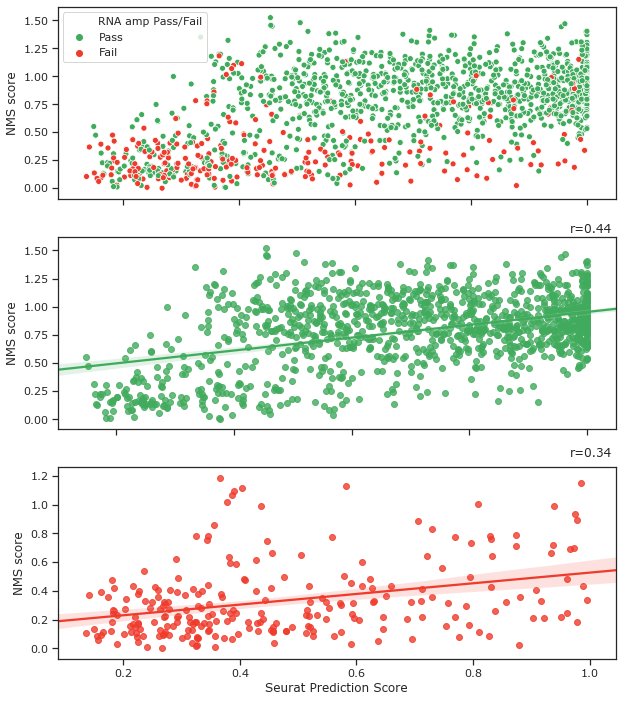

In [10]:
colors={"Pass": "#41ab5d", "Fail": "#ef3b2c"}
fig_dims = (10, 12)
f, axes = plt.subplots(nrows=3, ncols=1, figsize=fig_dims)

ax = sns.scatterplot(y="NMS score", x="seurat_prediction_score_label", data=shinyh,
                     palette=colors, hue="RNA amp Pass/Fail", ax=axes[0])

corr = pearsonr(shinyh_rpass["seurat_prediction_score_label"], shinyh_rpass["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"

ax1 = sns.regplot(y="NMS score", x="seurat_prediction_score_label", data=shinyh_rpass, color="#41ab5d", ax=axes[1])
ax.text(0.97, -0.4, text, fontsize=12)


corr = pearsonr(shinyh_rfail["seurat_prediction_score_label"], shinyh_rfail["NMS score"])
corr = [np.round(c, 2) for c in corr]
text = f"r={corr[0]}"

ax2 = sns.regplot(y="NMS score", x="seurat_prediction_score_label", data=shinyh_rfail, color="#ef3b2c", ax=axes[2])
ax.text(0.97, -2.4, text, fontsize=12)


ax.set(xticklabels=[])
ax1.set(xticklabels=[])
ax.set_xlabel("")
ax1.set_xlabel("")
ax2.set_xlabel("Seurat Prediction Score")

##### Countplot

In [11]:
shinyh_npass = filter_df(shinyh, "NMS Pass/Fail", True)
shinyh_nfail = filter_df(shinyh, "NMS Pass/Fail", False)
shinyh_rpass = filter_df(shinyh, "RNA amp Pass/Fail", "Pass")
shinyh_rfail = filter_df(shinyh, "RNA amp Pass/Fail", "Fail")
rfail_nfail = filter_df(shinyh_rfail, "NMS Pass/Fail", False)
rfail_npass = filter_df(shinyh_rfail, "NMS Pass/Fail", True)
rpass_nfail = filter_df(shinyh_rpass, "NMS Pass/Fail", False)
rpass_npass = filter_df(shinyh_rpass, "NMS Pass/Fail", True)
rfail_nfail["Group"] = "RNA Fail/NMS Fail"
rfail_npass["Group"] = "RNA Fail/NMS Pass"
rpass_nfail["Group"] = "RNA Pass/NMS Fail"
rpass_npass["Group"] = "RNA Pass/NMS Pass"

INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == True
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == False
INFO:functions.temp_funcs:Filtered dataframe based on RNA amp Pass/Fail == Pass
INFO:functions.temp_funcs:Filtered dataframe based on RNA amp Pass/Fail == Fail
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == False
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == True
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == False
INFO:functions.temp_funcs:Filtered dataframe based on NMS Pass/Fail == True
C:\Users\kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__

In [12]:
count_rn = pd.concat([rfail_nfail, rfail_npass, rpass_nfail, rpass_npass])
count_rn["Group_count"] = count_rn.groupby("Group")["Tree_call"].transform("count")

In [13]:
count_rn

sample_id  cDNA quality (%>400 bp) RNA amp Pass/Fail  \
878   PAS4_181218_456_A01                    0.289              Fail   
1216  P2S4_180508_066_A01                    0.562              Fail   
1597  P2S4_180621_053_A01                    0.299              Fail   
2068  PES4_190813_657_A01                    0.360              Fail   
2175  P1S4_190514_003_A01                    0.757              Fail   
...                   ...                      ...               ...   
2938  P7S4_180920_301_A01                    0.484              Pass   
2988  P8S4_190122_357_A01                    0.376              Pass   
3020  P9S4_180424_406_A01                    0.699              Pass   
3124  PES4_190305_651_A01                    0.515              Pass   
3425  PXS4_180518_305_A01                    0.397              Pass   

      Amplified content (ng)  NMS score  NMS Pass/Fail  \
878                 7.558301   0.322838          False   
1216                3.027420   0.186740          False   
1597                6.185288   0.232931          False   
2068               10.114990   0.396362          False   
2175                1.223222   0.381382          False   
...                      ...        ...            ...   
2938                9.083311   0.558573           True   
2988               12.163754   0.416997           True   
3020               40.300115   0.564769           True   
3124                8.008964   0.426581           True   
3425               24.543470   0.427373           True   

      seurat_prediction_score_label Tree_call collaborator_label  \
878                        0.628648     PoorQ               AIBS   
1216                       0.978289     PoorQ               AIBS   
1597                       0.513516     PoorQ               AIBS   
2068                       0.427598     PoorQ               AIBS   
2175                       0.368181     PoorQ               AIBS   
...                             ...       ...                ...   
2938                       0.313538     PoorQ               AIBS   
2988                       0.235294     PoorQ               AIBS   
3020                       0.984582     PoorQ               AIBS   
3124                       0.642678     PoorQ               AIBS   
3425                       0.284612     PoorQ               AIBS   

                  Group  Group_count  
878   RNA Fail/NMS Fail          174  
1216  RNA Fail/NMS Fail          174  
1597  RNA Fail/NMS Fail          174  
2068  RNA Fail/NMS Fail          174  
2175  RNA Fail/NMS Fail          174  
...                 ...          ...  
2938  RNA Pass/NMS Pass         1078  
2988  RNA Pass/NMS Pass         1078  
3020  RNA Pass/NMS Pass         1078  
3124  RNA Pass/NMS Pass         1078  
3425  RNA Pass/NMS Pass         1078  

[1489 rows x 11 columns]

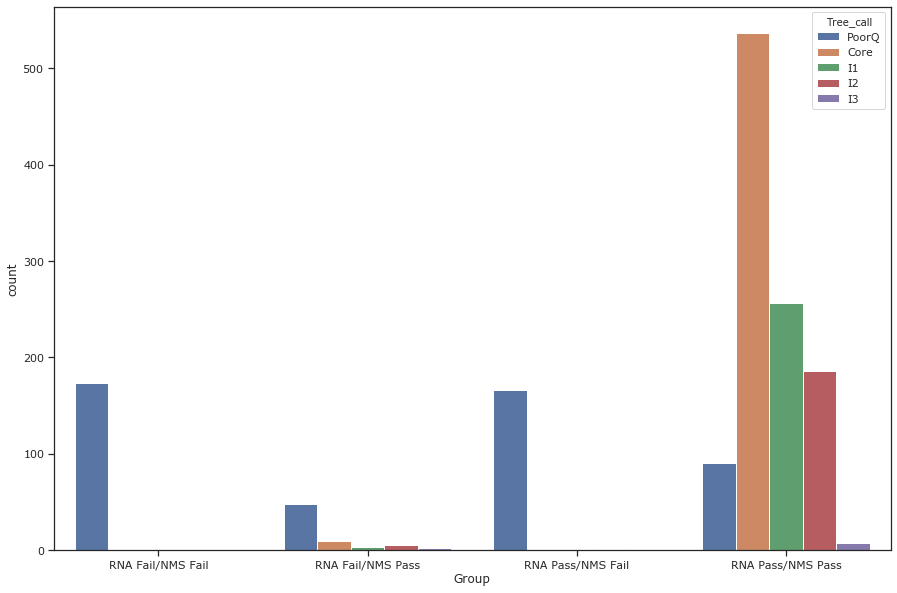

In [14]:
fig_dims = (15, 10)
f, axes = plt.subplots(figsize=fig_dims)
sns.countplot(x="Group", data=count_rn, hue="Tree_call")

In [15]:
group_list = ["RNA Fail/NMS Fail", "RNA Fail/NMS Pass", "RNA Pass/NMS Fail", "RNA Pass/NMS Pass"]

In [16]:
print(f"RNA Fail/NMS Fail: {rfail_nfail.sample_id.count()}")
print(f"RNA Fail/NMS Pass: {rfail_npass.sample_id.count()}")
print(f"RNA Pass/NMS Fail: {rpass_nfail.sample_id.count()}")
print(f"RNA Pass/NMS Pass: {rpass_npass.sample_id.count()}")

RNA Fail/NMS Fail: 174
RNA Fail/NMS Pass: 69
RNA Pass/NMS Fail: 168
RNA Pass/NMS Pass: 1078


In [59]:
rfail_nfail.Tree_call.value_counts(normalize=True)

PoorQ    1.0
Name: Tree_call, dtype: float64

In [60]:
rfail_npass.Tree_call.value_counts(normalize=True)

PoorQ    0.695652
Core     0.144928
I2       0.086957
I1       0.043478
I3       0.028986
Name: Tree_call, dtype: float64

In [61]:
rpass_nfail.Tree_call.value_counts(normalize=True)

PoorQ    0.988095
I2       0.005952
Core     0.005952
Name: Tree_call, dtype: float64

In [62]:
rpass_npass.Tree_call.value_counts(normalize=True)

Core     0.498145
I1       0.237477
I2       0.172542
PoorQ    0.084416
I3       0.007421
Name: Tree_call, dtype: float64

In [17]:
print(f"Rpass total count: {shinyh_rpass.sample_id.count()}")
print(f"Rfail total count: {shinyh_rfail.sample_id.count()}")

Rpass total count: 1246
Rfail total count: 243


In [18]:
rfail_nfail.drop(columns=["sample_id", "cDNA quality (%>400 bp)", "Amplified content (ng)",
                          "NMS score", "seurat_prediction_score_label", "collaborator_label"], inplace=True)

C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
#rfail_nfail.drop(columns=["RNA amp Pass/Fail", "NMS Pass/Fail"], inplace=True)

In [ ]:
rfail_nfail_piv = rfail_nfail.pivot_table(rfail_nfail, values='D', index=['Group", "Tree_call"],
                    columns=["Tree_call"], aggfunc=np.sum)

In [39]:
rfail_npass.drop(columns=["sample_id", "cDNA quality (%>400 bp)", "Amplified content (ng)",
                          "NMS score", "seurat_prediction_score_label", "collaborator_label"], inplace=True)

C:\Users\kumar\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [45]:
rfail_npass

RNA amp Pass/Fail  NMS Pass/Fail Tree_call              Group
17                Fail           True      Core  RNA Fail/NMS Pass
74                Fail           True      Core  RNA Fail/NMS Pass
84                Fail           True      Core  RNA Fail/NMS Pass
149               Fail           True     PoorQ  RNA Fail/NMS Pass
264               Fail           True      Core  RNA Fail/NMS Pass
...                ...            ...       ...                ...
3040              Fail           True     PoorQ  RNA Fail/NMS Pass
3133              Fail           True     PoorQ  RNA Fail/NMS Pass
3477              Fail           True     PoorQ  RNA Fail/NMS Pass
3478              Fail           True     PoorQ  RNA Fail/NMS Pass
3589              Fail           True     PoorQ  RNA Fail/NMS Pass

[69 rows x 4 columns]

In [53]:
new_pass = count_rn.groupby(["Group", "Tree_call"]).Tree_call.agg('count').to_frame("Count").reset_index()

In [54]:
new_piv = pd.pivot_table(new_pass, values='Count', index=["Group"], columns="Tree_call")

In [63]:
count_colors={"Core": "#41ab5d", "I1": "#2171b5", "I2": "#4292c6", "I3": "#6baed6", "PoorQ": "#ef3b2c"}

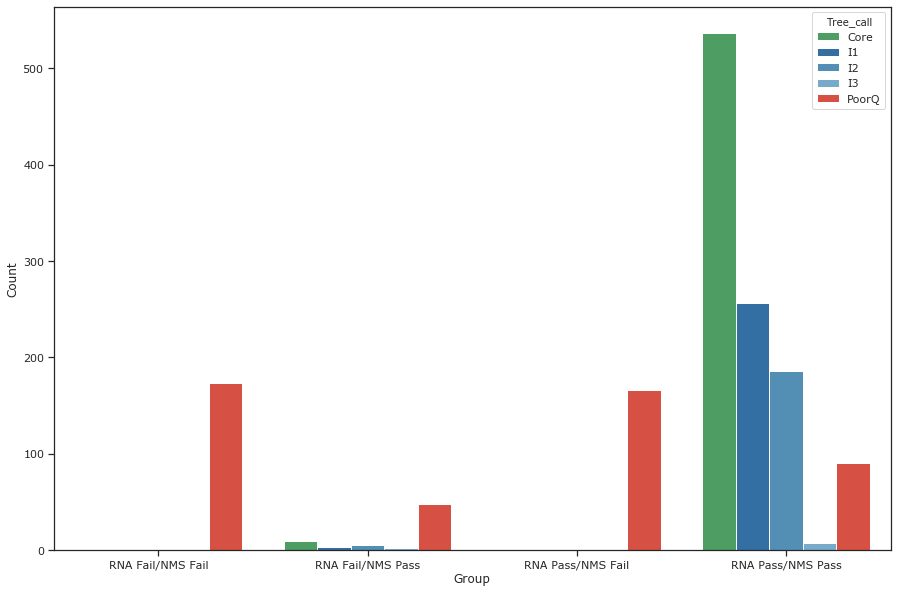

In [75]:
fig_dims = (15, 10)
f, axes = plt.subplots(figsize=fig_dims)
sns.barplot(x="Group", y="Count", hue="Tree_call", data=new_pass, palette=count_colors, hue_order=count_colors)

In [44]:
new_pass

Group Tree_call  Count
0   RNA Fail/NMS Fail     PoorQ    174
1   RNA Fail/NMS Pass      Core     10
2   RNA Fail/NMS Pass        I1      3
3   RNA Fail/NMS Pass        I2      6
4   RNA Fail/NMS Pass        I3      2
5   RNA Fail/NMS Pass     PoorQ     48
6   RNA Pass/NMS Fail      Core      1
7   RNA Pass/NMS Fail        I2      1
8   RNA Pass/NMS Fail     PoorQ    166
9   RNA Pass/NMS Pass      Core    537
10  RNA Pass/NMS Pass        I1    256
11  RNA Pass/NMS Pass        I2    186
12  RNA Pass/NMS Pass        I3      8
13  RNA Pass/NMS Pass     PoorQ     91

In [31]:
new = count_rn.groupby(["Group", "Tree_call"]).Tree_call.agg('count').to_frame("Count").reset_index()

In [33]:
new_piv = pd.pivot_table(new, values='Count', index=["Group"], columns="Tree_call")
new_piv

Tree_call           Core     I1     I2   I3  PoorQ
Group                                             
RNA Fail/NMS Fail    NaN    NaN    NaN  NaN  174.0
RNA Fail/NMS Pass   10.0    3.0    6.0  2.0   48.0
RNA Pass/NMS Fail    1.0    NaN    1.0  NaN  166.0
RNA Pass/NMS Pass  537.0  256.0  186.0  8.0   91.0

In [32]:
new

Group Tree_call  Count
0   RNA Fail/NMS Fail     PoorQ    174
1   RNA Fail/NMS Pass      Core     10
2   RNA Fail/NMS Pass        I1      3
3   RNA Fail/NMS Pass        I2      6
4   RNA Fail/NMS Pass        I3      2
5   RNA Fail/NMS Pass     PoorQ     48
6   RNA Pass/NMS Fail      Core      1
7   RNA Pass/NMS Fail        I2      1
8   RNA Pass/NMS Fail     PoorQ    166
9   RNA Pass/NMS Pass      Core    537
10  RNA Pass/NMS Pass        I1    256
11  RNA Pass/NMS Pass        I2    186
12  RNA Pass/NMS Pass        I3      8
13  RNA Pass/NMS Pass     PoorQ     91

In [36]:
new.Group.value_counts(normalize=True)

RNA Pass/NMS Pass    0.357143
RNA Fail/NMS Pass    0.357143
RNA Pass/NMS Fail    0.214286
RNA Fail/NMS Fail    0.071429
Name: Group, dtype: float64

In [30]:
new = count_rn.pivot_table(["Group", "Tree_call"]).Tree_call.agg('count')


ValueError: No group keys passed!

In [24]:
rfail_npass.groupby(["Group", "Tree_call"]).Tree_call.agg('count')

Group              Tree_call
RNA Fail/NMS Pass  Core         10
                   I1            3
                   I2            6
                   I3            2
                   PoorQ        48
Name: Tree_call, dtype: int64

In [23]:
rfail_nfail.groupby(["Group", "Tree_call"]).Tree_call.agg('count')

Group              Tree_call
RNA Fail/NMS Fail  PoorQ        174
Name: Tree_call, dtype: int64

In [ ]:
rfail_nfail.Tree_call.value_counts(normalize=True)

In [ ]:
count_rn

In [ ]:
count_rn_piv = count_rn.pivot_table()

In [ ]:
count_rn_group = count_rn.["Group", "Tree_call"])
count_rn_group

In [ ]:
rfail_nfail.Tree_call.value_counts(normalize=True) #rfail_nfail["Tree_call"].value_counts() / rfail_nfail["Tree_call"].count()
rfail_npass.Tree_call.value_counts(normalize=True)
rpass_nfail.Tree_call.value_counts(normalize=True)
rpass_npass.Tree_call.value_counts(normalize=True)

In [ ]:
count_rn["Group"].value_counts() / count_rn["Group"].count()

##### Filter project code

In [ ]:
#shinyh = filter_df(shinyh, "NMS Pass/Fail", True)
#shinyh = filter_df(shinyh, "RNA amp Pass/Fail", "Fail")

##### Counts

In [ ]:
aibs = filter_df(shinyh, "collaborator_label", "AIBS")
pg = filter_df(shinyh, "collaborator_label", "Gabor")
ph = filter_df(shinyh, "collaborator_label", "Mansvelder")
print(f"Human total count: {shinyh.sample_id.count()}")
print(f"AIBS count: {aibs.sample_id.count()}")
print(f"Gabor count: {pg.sample_id.count()}")
print(f"Mansvelder count: {ph.sample_id.count()}")